In [1]:
# Projectwork

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import urllib.request
import zipfile
import io
import csv
import random

# from google.colab import drive
# drive.mount('/content/drive')

%matplotlib inline


In [2]:
### Info regarding the data:

print(f'Some info on the Gisette data:\n')
with open('./data/gisette.param') as csvfile:
    for row in csv.reader(csvfile):
        print(row[0])

Some info on the Gisette data:

Data type: non-sparse
Number of features: 5000
Number of examples and check-sums:
     	Pos_ex	Neg_ex	Tot_ex	Check_sum
Train	 3000	 3000	 6000	3164568508.00
Valid	  500	  500	 1000	535016668.00
Test	 3250	 3250	 6500	3431572010.00
All  	 6750	 6750	13500	7131157186.00


In [3]:
### Writing algorithim for Support Vector Machine (Linear in Dimension = 5000)

class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=100):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        # __init__ weights
        self.w = np.zeros(shape=n_features)
        self.b = random.randint(0,999)

        for _ in range(self.n_iters):
            for idx, x_i in X.iterrows():
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w = self.w - (self.lr * (2 * self.lambda_param * self.w))
                else:
                    self.w = self.w - (self.lr * (2 * self.lambda_param * self.w - (x_i * y_[idx])))
                    self.b = self.b - (self.lr * y_[idx])

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        tolerance_gap = np.absolute(approx)
        tolerance_gap = np.min(tolerance_gap)
        return tolerance_gap, np.sign(approx)


In [21]:
### Reading the Training Set Data and cleaning as needed

gisette_train_data = pd.read_csv('./data/./data/gisette_train.data', delimiter=' ', header=None)

gisette_train_data

# gisette_train_data = gisette_train_data.dropna(axis=1, how='all')

gisette_train_data

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,550,0,495,0,0,0,0,976,0,0,...,0,0,991,991,0,0,0,0,983,NaN
1,0,0,0,0,0,0,0,976,0,0,...,475,0,991,0,0,991,0,0,0,NaN
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,674,0,0,838,NaN
4,0,0,0,0,0,0,0,608,0,979,...,0,0,828,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,783,0,0,0,NaN
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,921,0,886,0,NaN
5997,0,0,0,0,0,758,0,0,0,522,...,901,0,0,0,0,980,0,0,0,NaN
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,690,0,0,0,0,0,NaN


In [5]:

### Reading True Positive & Negative Values for the Training Set Data

gisette_train_labels = pd.read_csv('./data/./data/gisette_train.labels', delimiter=' ', header=None)

gisette_train_labels

,0
0,1
1,-1
2,1
3,1
4,1
...,...
5995,-1
5996,1
5997,-1
5998,-1


In [22]:
### Reading the Testing Set Data and cleaning similar to as done for the Training Set Data
### Used the data set by the name = 'gisette_valid.data' as our trial Testing Set Data
### The original Testing Set Data provided is named 'gisette_test.data' but we don't have labels for that to check our algorithm

gisette_test_data = pd.read_csv('./data/./data/gisette_valid.data', delimiter=' ', header=None)

gisette_test_data

gisette_test_data = gisette_test_data.dropna(axis=1, how='all')

gisette_test_data

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,688,0,0,0,0,0,0,952,0,870,...,0,0,0,0,0,494,0,769,0,NaN
1,778,758,0,0,0,0,0,708,0,991,...,0,0,770,0,0,0,0,0,0,NaN
2,469,0,816,0,0,0,0,0,0,0,...,0,0,467,0,0,0,417,0,0,NaN
3,0,0,0,0,0,571,991,983,0,983,...,0,0,0,0,0,0,0,0,0,NaN
4,0,0,0,0,0,0,0,949,0,991,...,0,0,0,0,0,0,0,976,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,511,0,0,0,0,0,0,0,0,...,0,0,852,0,0,0,0,0,0,NaN
996,0,0,599,0,0,0,0,910,0,0,...,0,0,0,0,0,0,0,0,707,NaN
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,742,NaN
998,0,0,0,0,0,0,0,968,0,0,...,0,0,773,0,0,0,0,0,0,NaN


In [7]:
### Reading True Positive & Negative Values for our trial Testing Set Data

gisette_test_labels = pd.read_csv('./data/./data/gisette_valid.labels', delimiter=' ', header=None)

gisette_test_labels


,0
0,1
1,1
2,-1
3,1
4,1
...,...
995,-1
996,1
997,1
998,-1


In [27]:
merged_df = gisette_train_labels.merge(gisette_train_data, left_index=True, right_index=True)

averages = merged_df.groupby("0_x").mean()
# averages

difference = averages.iloc[0] - averages.iloc[1]
difference
filtered_difference = difference[(difference < -300) | (difference > 300)]
filtered_difference

214     496.799000
338     467.385667
455     331.860667
511     500.285667
532     313.766333
           ...    
4856    389.251667
4869    327.997333
4875    436.796333
4878    431.228333
4963    431.476667
Length: 72, dtype: float64

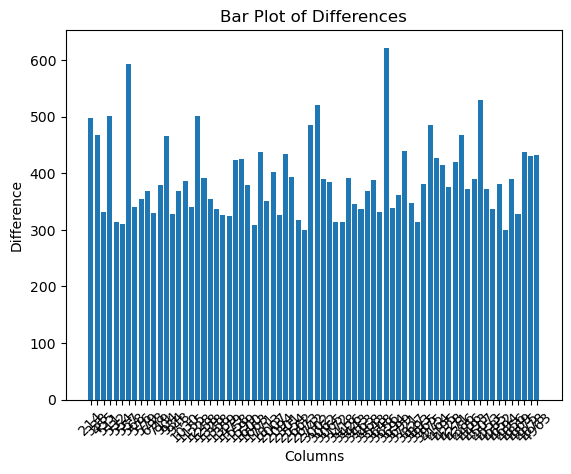

In [9]:
# Assuming `difference` is the Series containing the difference values
plt.bar(filtered_difference.index.astype(str), filtered_difference)

plt.xlabel('Columns')
plt.ylabel('Difference')
plt.title('Bar Plot of Differences')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Reducing the training data baased on the filtered difference
reduced_train_data = gisette_train_data[filtered_difference.index]
reduced_train_data


,214,338,455,511,532,554,557,568,576,579,...,4507,4553,4585,4652,4694,4856,4869,4875,4878,4963
0,991,0,983,0,0,0,0,0,509,0,...,0,0,0,0,509,0,983,0,0,513
1,991,806,0,987,952,855,991,0,896,0,...,991,767,890,987,0,0,0,956,828,932
2,870,0,614,0,604,0,0,0,0,0,...,592,0,0,0,0,0,0,0,0,991
3,991,0,987,987,948,0,995,0,402,0,...,991,0,0,902,0,825,0,948,987,748
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,310,0,564,0,0,807,0,827,468,...,870,0,286,0,691,0,0,0,804,995
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,936,820,765,991,929,901,917,0,570,0,...,995,0,0,991,0,0,0,991,665,572
5998,760,633,673,952,987,773,0,0,0,0,...,991,0,0,566,0,498,0,948,0,0


In [11]:
# Reducing the testing data baased on the filtered difference
reduced_test_data = gisette_test_data[filtered_difference.index]
reduced_test_data

merged_df = gisette_test_labels.merge(reduced_test_data, left_index=True, right_index=True)

averages = merged_df.groupby(0).mean()
averages


,214,338,455,511,532,554,557,568,576,579,...,4507,4553,4585,4652,4694,4856,4869,4875,4878,4963
0,,,,,,,,,,,,,,,,,,,,,
-1,687.592,571.500,380.454,583.098,384.962,374.734,689.672,343.414,434.750,388.558,...,700.678,421.244,345.374,419.928,328.676,409.530,400.522,506.384,522.902,609.142
1,219.904,118.512,55.846,77.654,51.406,70.016,123.198,19.538,98.602,31.312,...,177.054,57.508,26.894,45.180,69.462,37.344,106.446,74.366,108.094,228.240


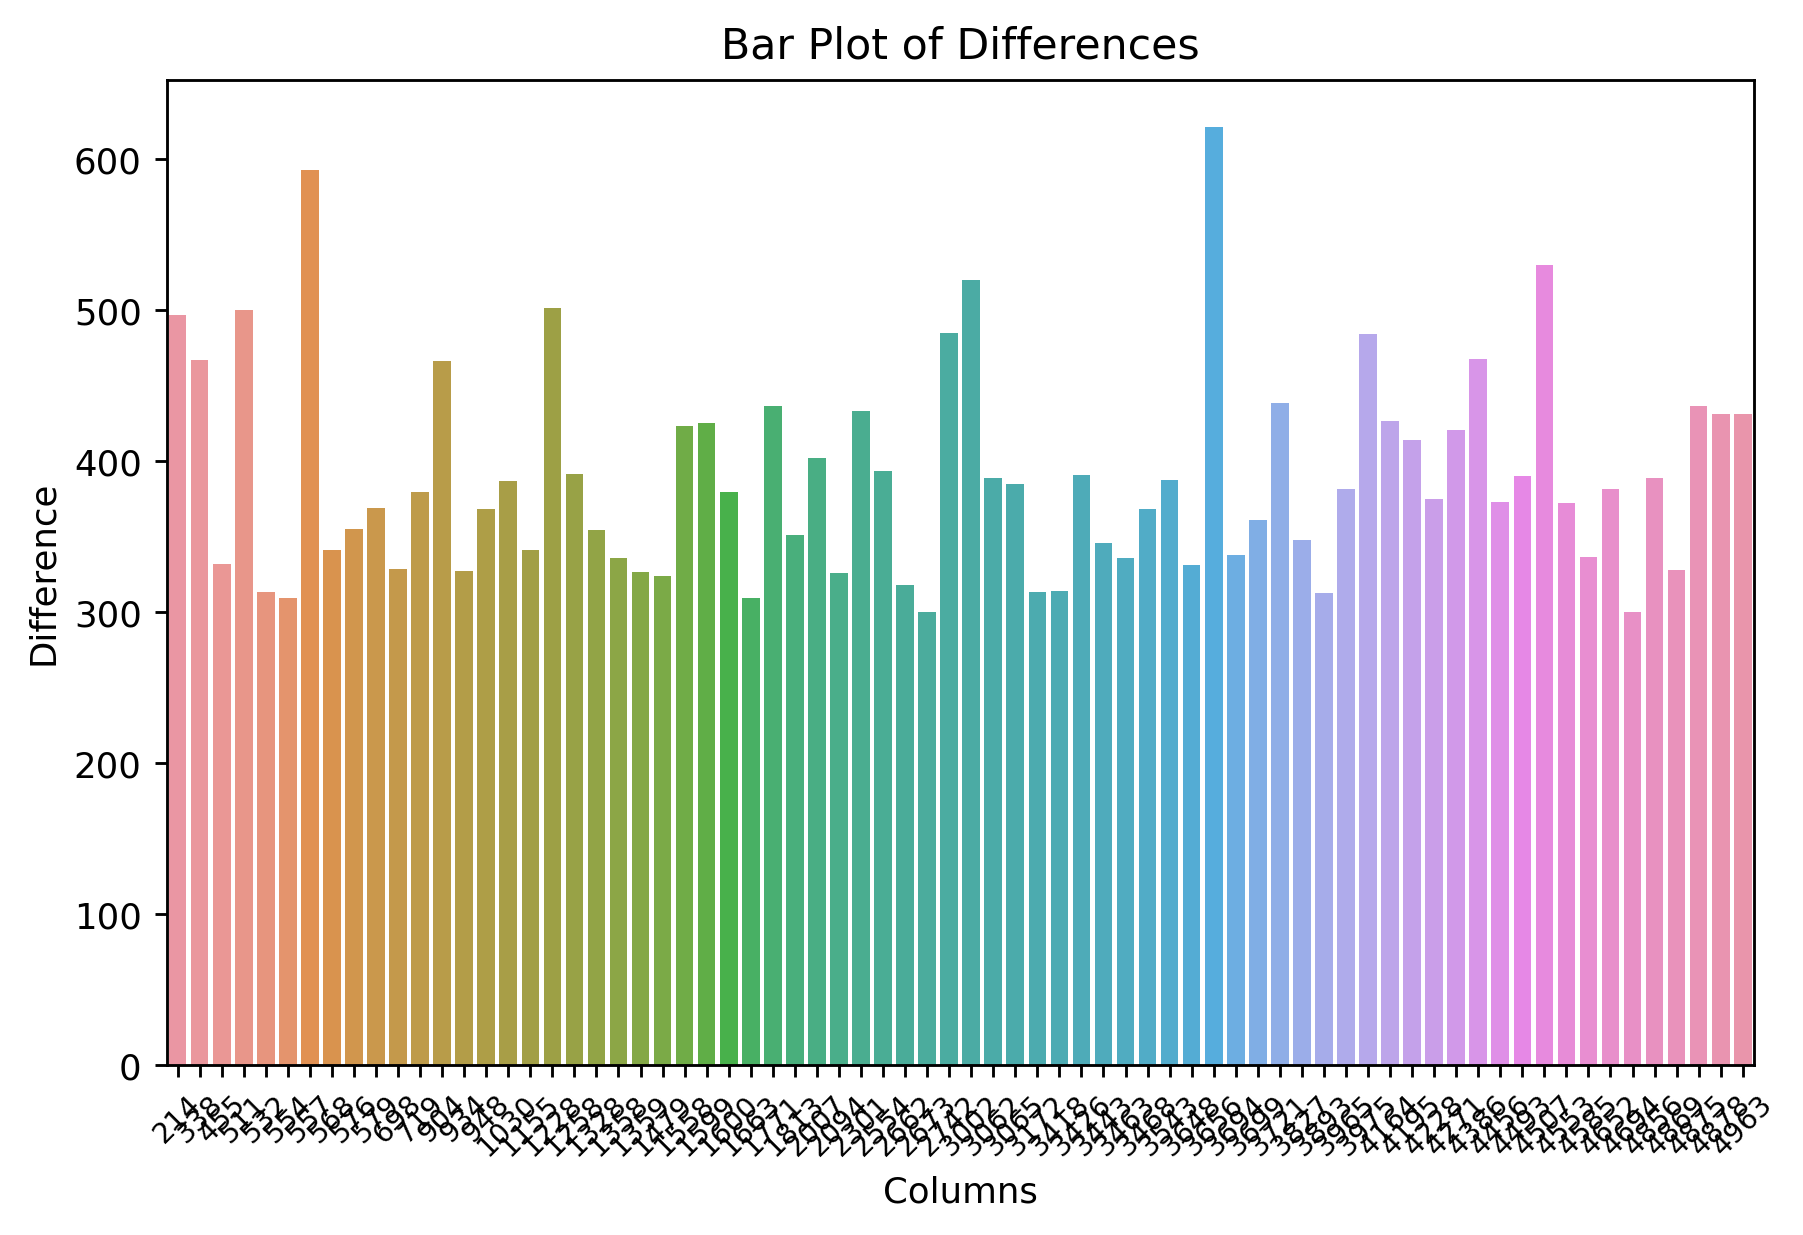

In [12]:

difference = averages.iloc[0] - averages.iloc[1]

figure(figsize=(8, 5), dpi=256)
sns.barplot(x=difference.index, y=filtered_difference)

plt.xlabel('Columns')
plt.ylabel('Difference')
plt.title('Bar Plot of Differences')
plt.xticks(rotation=45, fontsize=8)
plt.show()

In [13]:
averages



,214,338,455,511,532,554,557,568,576,579,...,4507,4553,4585,4652,4694,4856,4869,4875,4878,4963
0,,,,,,,,,,,,,,,,,,,,,
-1,687.592,571.500,380.454,583.098,384.962,374.734,689.672,343.414,434.750,388.558,...,700.678,421.244,345.374,419.928,328.676,409.530,400.522,506.384,522.902,609.142
1,219.904,118.512,55.846,77.654,51.406,70.016,123.198,19.538,98.602,31.312,...,177.054,57.508,26.894,45.180,69.462,37.344,106.446,74.366,108.094,228.240


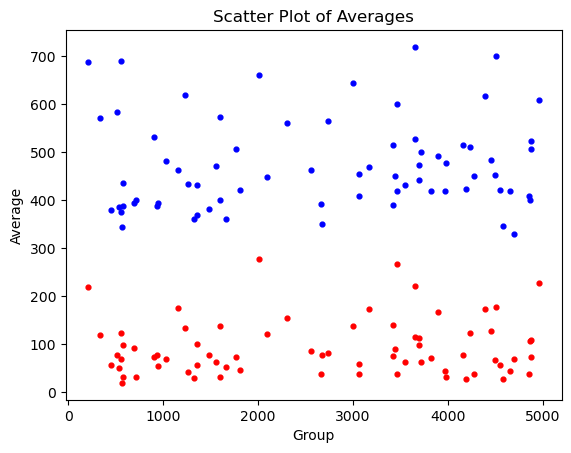

In [14]:
averages_transposed = averages.T  # Transpose the DataFrame

x = averages_transposed.index  # X-axis values
y1 = averages.values[0]  # Y-axis values


plt.scatter(x, y1, c='blue', s=12)  # Create the scatter plot with different colors


y2 = averages.values[1]  # Y-axis values

plt.scatter(x, y2, c='red', s=12)  # Create the scatter plot with different colors


plt.xlabel('Group')
plt.ylabel('Average')
plt.title('Scatter Plot of Averages')
plt.show()

In [15]:
### Running the algorithm over our Training Set Data to train it

run = SVM()
run.fit(gisette_train_data, gisette_train_labels)

### Running the algorithm prediction to calculate tolerance and the Predicted Positive & Negative Values for our Training Set Data

tol_train, train_fit = run.predict(gisette_train_data)
train_fit = pd.DataFrame(train_fit)

### Running the algorithm prediction to calculate tolerance and the Predicted Positive & Negative Values for our trial Testing Set Data

tol_predict, predictions = run.predict(gisette_test_data)
predictions = pd.DataFrame(predictions)

In [16]:
### Creating Table for Actual & Predicted Positives & Negatives for our Training Data Set

train_data = [[0,0],[0,0]]
for idx, row in gisette_train_labels.iterrows():
  if (int(row) > 0 and int(train_fit.loc[idx]) > 0):
    train_data[0][0] += 1
  elif (int(row) > 0 and int(train_fit.loc[idx]) < 0):
    train_data[0][1] += 1
  elif (int(row) < 0 and int(train_fit.loc[idx]) > 0):
    train_data[1][0] += 1
  else:
    train_data[1][1] += 1


In [17]:
### Printing Table for Actual & Predicted Positives & Negatives for our Training Data Set

header = pd.MultiIndex.from_product([['Training Data Set (Total Count: 6000)'],
                                     ['Predicted Positive', 'Predicted Negative']],
                                    names=['Data Type:','Values'])
SVM_train = pd.DataFrame(data=train_data, index=['Actual Positive', 'Actual Negative'],
                        columns=header)
print(SVM_train)


### Printing Accuracy and Tolerance results

print('Accuracy for Training Set:', (6000 - train_fit.compare(gisette_train_labels).count().mean())/60)
print('Tolerance for Training Set:', tol_train)

Data Type:      Training Data Set (Total Count: 6000)                   
Values                             Predicted Positive Predicted Negative
Actual Positive                                  2987                 13
Actual Negative                                    12               2988
Accuracy for Training Set: 99.58333333333333
Tolerance for Training Set: 383.8098066038001


In [18]:
### Creating Table for Actual & Predicted Positives & Negatives for our trial Testing Data Set

test_data = [[0,0],[0,0]]
for idx, row in gisette_test_labels.iterrows():
  if (int(row) > 0 and int(predictions.loc[idx]) > 0):
    test_data[0][0] += 1
  elif (int(row) > 0 and int(predictions.loc[idx]) < 0):
    test_data[0][1] += 1
  elif (int(row) < 0 and int(predictions.loc[idx]) > 0):
    test_data[1][0] += 1
  else:
    test_data[1][1] += 1

### Printing Table for Actual & Predicted Positives & Negatives for our trial Testing Data Set

header = pd.MultiIndex.from_product([['Testing Data Set (Total Count: 1000)'],
                                     ['Predicted Positive', 'Predicted Negative']],
                                    names=['Data Type:','Values'])
SVM_test = pd.DataFrame(data=test_data, index=['Actual Positive', 'Actual Negative'],
                        columns=header)
print(SVM_test)

### Printing Accuracy and Tolerance results

print('Accuracy for Testing Set:', (1000 - predictions.compare(gisette_test_labels).count().mean())/10)
print('Tolerance for Testing Set:', tol_predict)

Data Type:      Testing Data Set (Total Count: 1000)                   
Values                            Predicted Positive Predicted Negative
Actual Positive                                  482                 18
Actual Negative                                   11                489
Accuracy for Testing Set: 97.1
Tolerance for Testing Set: 1450.9096210328448
